## Prepare the features and data pipeline for general machine learning study:
1. Load the merged data into python pandas 
2. Build up the data structurte for machine learning algorithms, clutering in this experimental
3. Apply DB Scan, Set Level Tree, etc

In [41]:
import pandas as pd
import os
import csv

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

sns.set(style="darkgrid")

In [38]:
data_dir = '/mapr/datalake/uhclake/perf/Sqoop_RX/ymalcow/101_clustering_proj01/'
path_csvs = 'prep01ML_all2_csv'

path_mrgs = os.path.join(data_dir, path_csvs)

In [44]:
# mem_attrs: member attributes
# mem_attrs: merged claim attributes with members
mem_attrs = ['member_individual_identifier','src_cdb_xref_id','lgcy_src_id','social_security_number_hashed' , 'member_last_name','member_first_name' ,'member_middle_name','member_middle_initial_text', 'member_name_suffix' , 'mem_dob_hashed', 'memeber_zip_code_of_residence','member_sex','addr_line_1','addr_line_2','city_name','state','zipcode','country']
mrg_attrs = ['claim_identifier', 'claim_system_identifier', 'member_identifier', 'member_individual_identifier', \
             'member_division_identifier', 'admission_src_code', 'icd_version_number', 'procedure_code', \
             'diag_code_diag_type_present_on_admis_ind', 'provider_medicare_identifier', 'drg', 'first_service_date', \
             'last_service_date', 'charged_amount', 'paid_amount', 'network_type', 'revenue_code', 'admission_type_code', \
             'hospital_discharge_code', 'place_of_service_code', 'billing_npi_identifier', 'rendering_npi_identifier', \
             'attending_npi_identifier', 'referring_npi_identifier', 'provider_mpin_number', 'provider_tin_identifier', \
             'provider_name', 'provider_address_street_text', 'provider_city_name', 'provider_state_code', \
             'provider_zip_code', 'mth', 'member_last_name', 'member_first_name', 'member_middle_name', \
             'member_middle_initial_text', 'member_name_suffix', 'member_age', 'member_zip_code_of_residence', \
             'member_income', 'member_income_type', 'member_alive_ind', 'tops_relationship_code', 'tops_sequence_number', \
             'member_marital_status', 'member_sex', 'member_race', 'member_coverage_effective_date', 
             'member_coverage_end_date', 'member_cosmos_panel_number', 'government_program_type_description', \
             'employee_status_type_description']

In [45]:
len(mrg_attrs)

52

In [46]:
# Use only one chunk to perform initial exploration
samp_mrg = pd.read_csv(os.path.join(path_mrgs, mrgs[1]), sep = ';', names = mrg_attrs, error_bad_lines=False)

/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (13,16,19,24,30,37,49) have mixed types. Specify dtype option on import or set low_memory=False.



In [47]:
# Change the order of the dataframe, move charged_amount and paid_amount to the end:
reord_cols = ['claim_identifier', 'claim_system_identifier', 'member_identifier', 'member_individual_identifier', \
             'member_division_identifier', 'admission_src_code', 'icd_version_number', 'procedure_code', \
             'diag_code_diag_type_present_on_admis_ind', 'provider_medicare_identifier', 'drg', 'first_service_date', \
             'last_service_date', 'network_type', 'revenue_code', 'admission_type_code', \
             'hospital_discharge_code', 'place_of_service_code', 'billing_npi_identifier', 'rendering_npi_identifier', \
             'attending_npi_identifier', 'referring_npi_identifier', 'provider_mpin_number', 'provider_tin_identifier', \
             'provider_name', 'provider_address_street_text', 'provider_city_name', 'provider_state_code', \
             'provider_zip_code', 'mth', 'member_last_name', 'member_first_name', 'member_middle_name', \
             'member_middle_initial_text', 'member_name_suffix', 'member_age', 'member_zip_code_of_residence', \
             'member_income', 'member_income_type', 'member_alive_ind', 'tops_relationship_code', 'tops_sequence_number', \
             'member_marital_status', 'member_sex', 'member_race', 'member_coverage_effective_date', 
             'member_coverage_end_date', 'member_cosmos_panel_number', 'government_program_type_description', \
             'employee_status_type_description', 'charged_amount', 'paid_amount']

In [48]:
# Apply the new order
samp_mrg = samp_mrg[reord_cols]

In [52]:
# Select features for exploration and initial moddeling
slt_cols = ['admission_src_code', 'icd_version_number', 'procedure_code', \
             'diag_code_diag_type_present_on_admis_ind', 'network_type', 'revenue_code', 'admission_type_code', \
             'hospital_discharge_code', 'place_of_service_code', 'provider_name', \
             'provider_zip_code', 'mth', 'member_age', 'member_zip_code_of_residence', \
             'member_income', 'member_income_type', 'tops_relationship_code', \
             'member_marital_status', 'member_sex', 'member_race', 'government_program_type_description', \
             'employee_status_type_description', 'charged_amount', 'paid_amount']
samp_slt = samp_mrg[slt_cols]

In [74]:
print (samp_slt.shape)
samp_slt.dtypes

(396521, 25)


admission_src_code                           object
icd_version_number                            int64
procedure_code                               object
diag_code_diag_type_present_on_admis_ind     object
network_type                                 object
revenue_code                                 object
admission_type_code                          object
hospital_discharge_code                      object
place_of_service_code                        object
provider_name                                object
provider_zip_code                            object
mth                                          object
member_age                                   object
member_zip_code_of_residence                  int64
member_income                               float64
member_income_type                          float64
tops_relationship_code                       object
member_marital_status                        object
member_sex                                   object
member_race 

In [ ]:
# Count of each label in each category

#names of all the columns

cols = samp_mrg.columns

#Plot count plot for all attributes in a 29x4 grid

n_cols = 2
n_rows = 11
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(10, 6))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=samp_mrg, ax=ax[j])

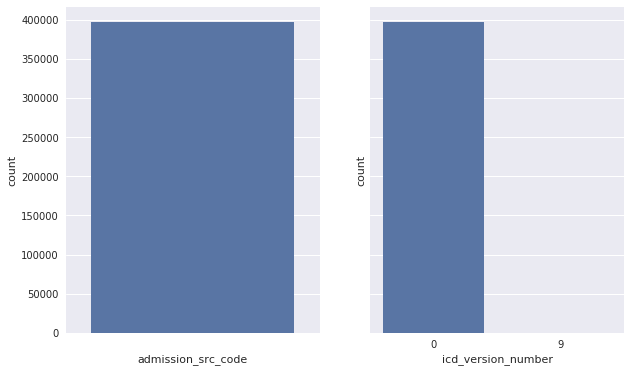

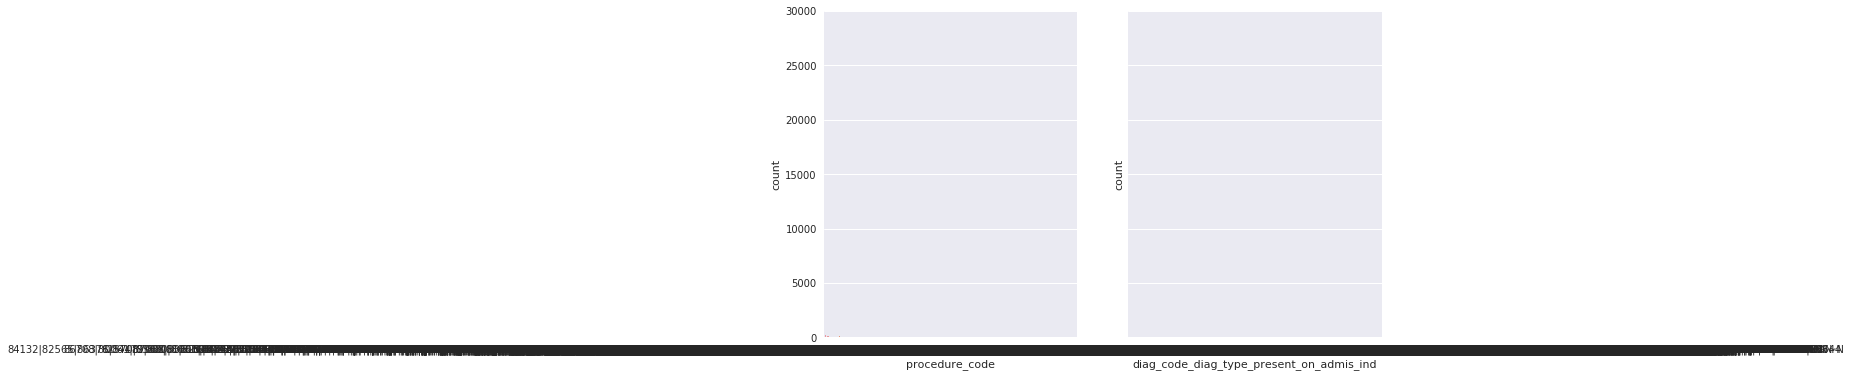

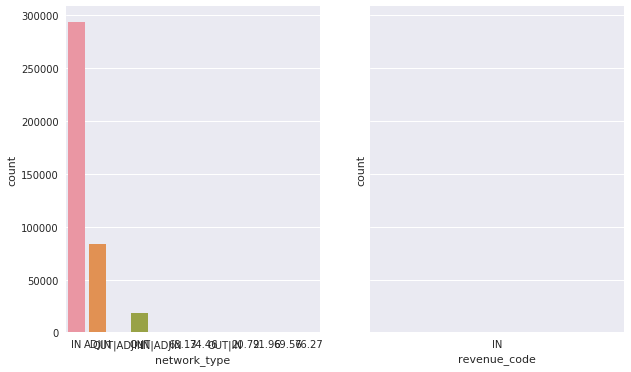

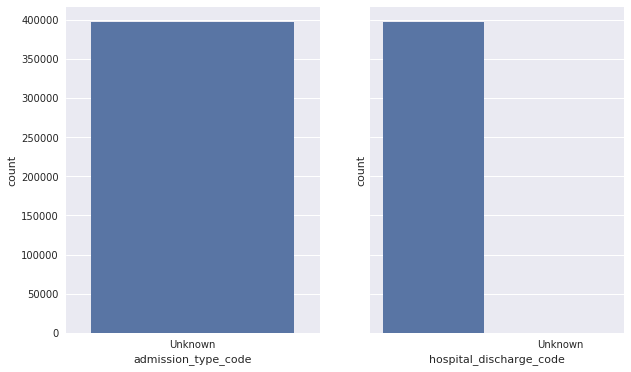

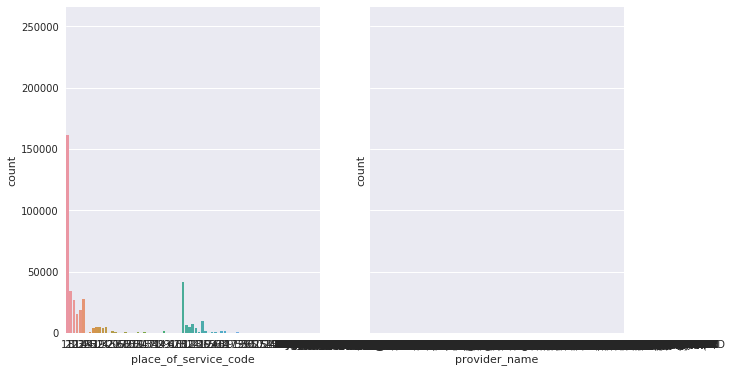

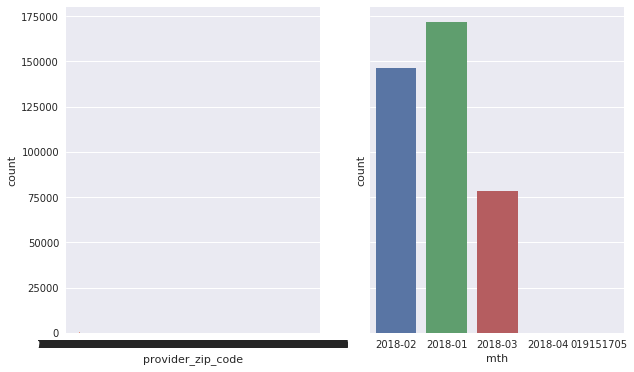

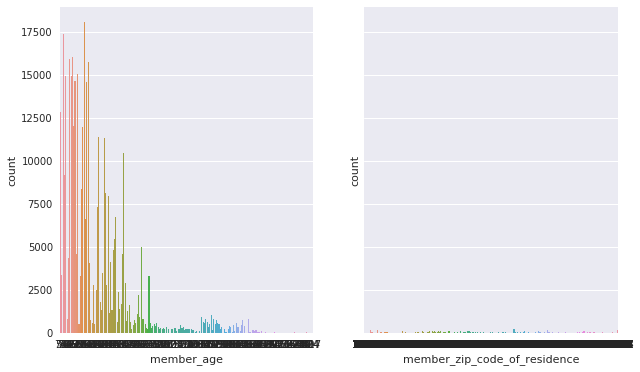

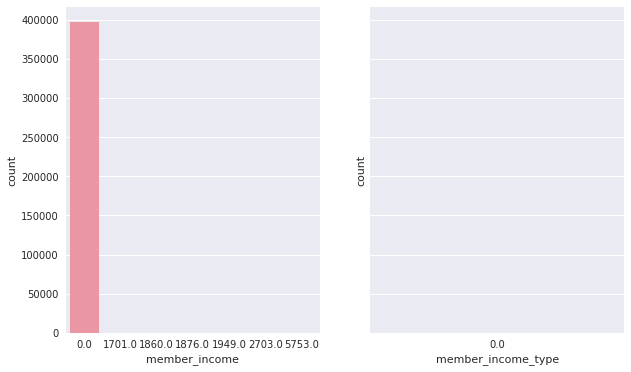

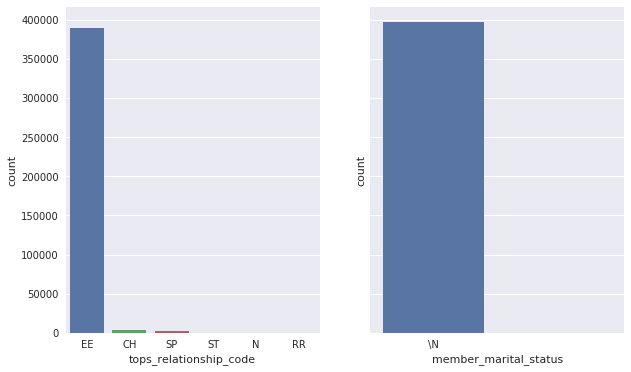

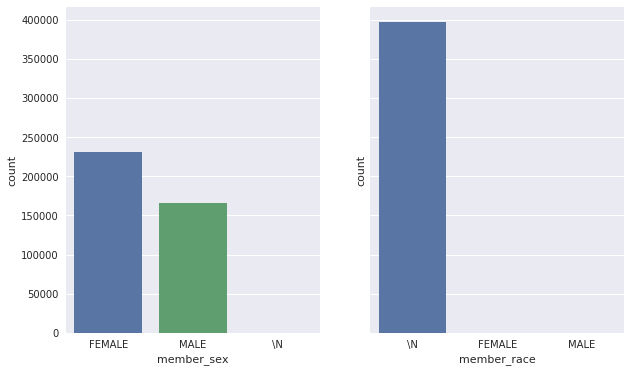

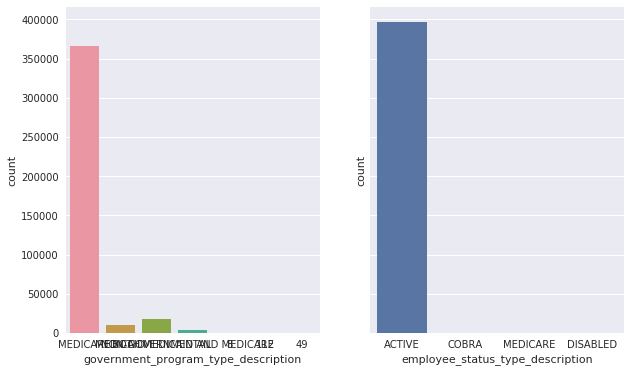

In [55]:
# Count of each label in each category

#names of all the columns

cols = samp_slt.columns

#Plot count plot for all attributes in a 29x4 grid

n_cols = 2
n_rows = 11
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(10, 6))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=samp_slt, ax=ax[j])
plt.show()

In [56]:
samp_slt['salary'] = samp_slt.member_income.apply(lambda x : float(x))

/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [66]:
samp_slt['salary'].max()
samp_slt['salary'].mean()
samp_slt[['salary' > 0]]['salary'].median()

TypeError: unorderable types: str() > int()

select distinct __admission_src_code__ from cosmos_pro_claim_mem_master_t01 limit 10;
OK
  
  Blank!!!!
  
select distinct __icd_version_number__ from cosmos_pro_claim_mem_master_t01 limit 10;
 
  OK
0
9

select __icd_version_number__, count(1) from cosmos_pro_claim_mem_master_t01 group by icd_version_number
  OK
0	21637629
9	209

select __procedure_code__, count(1) from cosmos_pro_claim_mem_master_t01 group by procedure_code limit 20;
OK
0001M|82105|82390|36415|82728|82103|80076|83540	1
00104	3192
00140|99100|G8427	2
00140|99140	1
00144|64400	1
00145|93000|99100	3
00170|99140	3
00170|D7230	1
00210|4255F	1
00140|00300	1
00140|4256F	8
00144|4250F	2
0014F	2
00160|64505	2
00160|99140|99100	2
00170|4256F	1
00100|4250F|4255F	1
00120|36620	4
00142|95954	1
00142|99140	1







In [82]:
samp_slt.head()

,admission_src_code,icd_version_number,procedure_code,diag_code_diag_type_present_on_admis_ind,network_type,revenue_code,admission_type_code,hospital_discharge_code,place_of_service_code,provider_name,...,member_income_type,tops_relationship_code,member_marital_status,member_sex,member_race,government_program_type_description,employee_status_type_description,charged_amount,paid_amount,salary
0,,0,G8419,Z6829~BK~N,IN,NaN,Unknown,,11,,...,NaN,EE,\N,FEMALE,\N,MEDICARE,ACTIVE,0.01,0.0,0.0
1,,0,1170F|1126F|1160F|1159F|1157F,Z0000~BK~N,IN,NaN,Unknown,,11,,...,NaN,EE,\N,FEMALE,\N,MEDICARE,ACTIVE,0.05,0.0,0.0
2,,0,3077F|3078F,I10~BF~N|Z0000~BK~N,IN,NaN,Unknown,,11,,...,NaN,EE,\N,FEMALE,\N,MEDICARE,ACTIVE,0.02,0.0,0.0
3,,0,99214,M1990~BF~N|M818~BF~N|I10~BK~N|E782~BF~N,IN,NaN,Unknown,,11,,...,NaN,EE,\N,FEMALE,\N,MEDICARE,ACTIVE,130,0.0,0.0
4,,0,99213|3074F|1160F|3078F|1159F,M549~BF~N|B360~BK~N|B352~BF~N,IN,NaN,Unknown,,11,,...,NaN,EE,\N,MALE,\N,MEDICARE,ACTIVE,205,0.0,0.0


In [85]:
samp_slt.member_income.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: member_income, dtype: float64

In [60]:
g = sns.pairplot(samp_slt[['salary', 'charged_amount', 'paid_amount']])

In [62]:
p.show()

NameError: name 'p' is not defined

In [69]:
sns.pairplot(samp_slt, vars = ['salary', 'charged_amount', 'paid_amount'])

TypeError: unorderable types: float() <= str()

In [71]:
samp_slt[['salary', 'charged_amount', 'paid_amount']].dtypes

salary            float64
charged_amount     object
paid_amount       float64
dtype: object

In [67]:
sns.pairplot(samp_slt[['salary', 'charged_amount', 'paid_amount']])

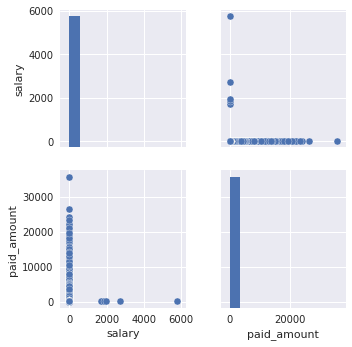

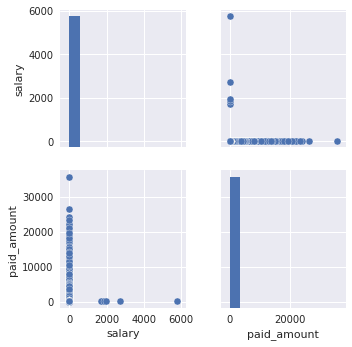

In [68]:
plt.show()

In [72]:
samp_slt['charged_amount'].astype(str).astype(float)

ValueError: could not convert string to float: '2018-03-15'

In [75]:
samp_slt.charged_amount.head()

0    0.01
1    0.05
2    0.02
3     130
4     205
Name: charged_amount, dtype: object

In [77]:
samp_slt[['_' in str(samp_slt['charged_amount'])]]['charged_amount']

ValueError: Item wrong length 1 instead of 396521.

In [81]:
samp_slt[samp_slt['charged_amount'].str.contains('1') == True]

,admission_src_code,icd_version_number,procedure_code,diag_code_diag_type_present_on_admis_ind,network_type,revenue_code,admission_type_code,hospital_discharge_code,place_of_service_code,provider_name,...,member_income_type,tops_relationship_code,member_marital_status,member_sex,member_race,government_program_type_description,employee_status_type_description,charged_amount,paid_amount,salary
114688,,0,86430|81001|86255|84550|85652|86140|73120|9920...,M3210~BF~N|M0579~BK~N|Z79899~BF~N,IN,NaN,Unknown,,11,,...,NaN,EE,\N,FEMALE,\N,MEDICARE,ACTIVE,1010.02,169.09,0.0
114692,,0,86160,M064~BK~N,ADJIN,NaN,Unknown,,81,PATHOLOGY LABORATORIES INC,...,NaN,EE,\N,FEMALE,\N,MEDICARE,ACTIVE,221.50,29.03,0.0
114694,,0,A4406|A5120|A4456|A4362|A4385|A4390,Z433~BK~N,IN,NaN,Unknown,,12,MCKESSON PATIENT CARE SOLUTION,...,NaN,EE,\N,MALE,\N,MEDICARE,ACTIVE,914.63,30.21,0.0
114695,,0,87804|99213,J0190~BF~N|J209~BK~N|Z0000~BF~N|R6889~BF~N,IN,NaN,Unknown,,11,,...,NaN,EE,\N,FEMALE,\N,MEDICARE,ACTIVE,198.00,28.00,0.0
114696,,0,99213,R946~BK~N,IN,NaN,Unknown,,11,,...,NaN,EE,\N,FEMALE,\N,MEDICARE,ACTIVE,136.00,54.70,0.0
114697,,0,99213,G4700~BF~N|Z9229~BF~N|E785~BF~N|M2550~BK~N,IN,NaN,Unknown,,11,,...,NaN,EE,\N,FEMALE,\N,MEDICARE,ACTIVE,136.00,54.70,0.0
114699,,0,99213,K2970~BF~N|R1013~BF~N|M545~BK~N|I10~BF~N,IN,NaN,Unknown,,11,,...,NaN,EE,\N,FEMALE,\N,MEDICARE,ACTIVE,100.00,55.49,0.0
114700,,0,76705,R110~BK~N|R1013~BF~N,IN,NaN,Unknown,,22,RADIOLOGY INC,...,NaN,EE,\N,FEMALE,\N,MEDICARE,ACTIVE,103.00,20.18,0.0
114702,,0,99213,M4856XA~BK~N|I10~BF~N,IN,NaN,Unknown,,11,,...,NaN,EE,\N,FEMALE,\N,MEDICARE,ACTIVE,100.00,55.49,0.0
114704,,0,99214,K2970~BF~N|R1013~BF~N|M545~BK~N|I10~BF~N,IN,NaN,Unknown,,11,,...,NaN,EE,\N,FEMALE,\N,MEDICARE,ACTIVE,145.00,20.57,0.0


In [1]:
import pandas as pd
import os
import csv

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [2]:
import plotly

In [3]:
path = os.path.abspath(plotly.__file__)

In [4]:
path

'/mapr/datalake/optum/optuminsight/health_at_scale/python/lib/python3.5/site-packages/plotly/__init__.py'

In [5]:
import gensim

In [6]:
import scipy
import matplotlib
import gensim
import sklearn
#import keras
#import tensorflow
import textblob
import math
import itertools
import collections
import jellyfish
import difflib

import ggplot

/mapr/datalake/optum/optuminsight/health_at_scale/python/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning:

pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp

/mapr/datalake/optum/optuminsight/health_at_scale/python/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning:

The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead

/mapr/datalake/optum/optuminsight/health_at_scale/python/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [61]:
print ("Test")

Test


In [25]:
import seaborn as sns

In [9]:
import pybrain

In [10]:
data_dir = '/mapr/datalake/uhclake/perf/Sqoop_RX/ymalcow/101_clustering_proj01/'
path_csvs = 'prep01ML_all2_csv'

path_mrgs = os.path.join(data_dir, path_csvs)

In [11]:
mrgs = os.listdir(path_mrgs)
mrgs

['.000029_0.crc',
 '000008_0',
 '000018_0',
 '000002_0',
 '.000013_0.crc',
 '.000005_0.crc',
 '000011_0',
 '000001_0',
 '.000019_0.crc',
 '.000043_0.crc',
 '.000042_0.crc',
 '.000048_0.crc',
 '.000000_0.crc',
 '.000026_0.crc',
 '.000028_0.crc',
 '000048_0',
 '.000014_0.crc',
 '.000015_0.crc',
 '000020_0',
 '000022_0',
 '000038_0',
 '000030_0',
 '.000017_0.crc',
 '000017_0',
 '000028_0',
 '000032_0',
 '.000007_0.crc',
 '.000022_0.crc',
 '000036_0',
 '.000044_0.crc',
 '.000020_0.crc',
 '.000006_0.crc',
 '000044_0',
 '000027_0',
 '000004_0',
 '000013_0',
 '000006_0',
 '000039_0',
 '000015_0',
 '000005_0',
 '000016_0',
 '000019_0',
 '.000024_0.crc',
 '.000025_0.crc',
 '.000009_0.crc',
 '000034_0',
 '000047_0',
 '000000_0',
 '000026_0',
 '000035_0',
 '.000012_0.crc',
 '000043_0',
 '.000038_0.crc',
 '000024_0',
 '.000002_0.crc',
 '.000030_0.crc',
 '000012_0',
 '.000036_0.crc',
 '.000047_0.crc',
 '.000034_0.crc',
 '.000039_0.crc',
 '.000046_0.crc',
 '.000041_0.crc',
 '000023_0',
 '.000001_0.c

In [12]:
mem_attrs = ['member_individual_identifier','src_cdb_xref_id','lgcy_src_id','social_security_number_hashed' , 'member_last_name','member_first_name' ,'member_middle_name','member_middle_initial_text', 'member_name_suffix' , 'mem_dob_hashed', 'memeber_zip_code_of_residence','member_sex','addr_line_1','addr_line_2','city_name','state','zipcode','country']
mrg_attrs = ['claim_identifier', 'claim_system_identifier', 'member_identifier', 'member_individual_identifier', \
             'member_division_identifier', 'admission_src_code', 'icd_version_number', 'procedure_code', \
             'diag_code_diag_type_present_on_admis_ind', 'provider_medicare_identifier', 'drg', 'first_service_date', \
             'last_service_date', 'charged_amount', 'paid_amount', 'network_type', 'revenue_code', 'admission_type_code', \
             'hospital_discharge_code', 'place_of_service_code', 'billing_npi_identifier', 'rendering_npi_identifier', \
             'attending_npi_identifier', 'referring_npi_identifier', 'provider_mpin_number', 'provider_tin_identifier', \
             'provider_name', 'provider_address_street_text', 'provider_city_name', 'provider_state_code', \
             'provider_zip_code', 'mth', 'member_last_name', 'member_first_name', 'member_middle_name', \
             'member_middle_initial_text', 'member_name_suffix', 'member_age', 'member_zip_code_of_residence', \
             'member_incom', 'member_income_type', 'member_alive_ind', 'tops_relationship_code', 'tops_sequence_number', \
             'member_marital_status', 'member_sex', 'member_race', 'member_coverage_effective_date', 
             'member_coverage_end_date', 'member_cosmos_panel_number', 'government_program_type_description', \
             'employee_status_type_description']

In [14]:
len(mrg_attrs)

52

In [15]:
# Use only one chunk to perform initial exploration
samp_mrg = pd.read_csv(os.path.join(path_mrgs, mrgs[1]), sep = ';', names = mrg_attrs, error_bad_lines=False)

/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (13,16,19,24,30,37,49) have mixed types. Specify dtype option on import or set low_memory=False.



In [16]:
samp_mrg.count()

claim_identifier                            396521
claim_system_identifier                     396521
member_identifier                           396521
member_individual_identifier                396521
member_division_identifier                  396521
admission_src_code                          396521
icd_version_number                          396521
procedure_code                              396521
diag_code_diag_type_present_on_admis_ind    396521
provider_medicare_identifier                396521
drg                                         396521
first_service_date                          396521
last_service_date                           396521
charged_amount                              396521
paid_amount                                 396521
network_type                                396521
revenue_code                                     6
admission_type_code                         396515
hospital_discharge_code                     396521
place_of_service_code          

In [17]:
samp_mrg.charged_amount.head()

0    0.01
1    0.05
2    0.02
3     130
4     205
Name: charged_amount, dtype: object

In [18]:
samp_mrg.paid_amount.tail()

396516    255.37
396517     57.25
396518     88.05
396519     81.61
396520     57.82
Name: paid_amount, dtype: float64

In [19]:
samp_mrg.columns.tolist()

['claim_identifier',
 'claim_system_identifier',
 'member_identifier',
 'member_individual_identifier',
 'member_division_identifier',
 'admission_src_code',
 'icd_version_number',
 'procedure_code',
 'diag_code_diag_type_present_on_admis_ind',
 'provider_medicare_identifier',
 'drg',
 'first_service_date',
 'last_service_date',
 'charged_amount',
 'paid_amount',
 'network_type',
 'revenue_code',
 'admission_type_code',
 'hospital_discharge_code',
 'place_of_service_code',
 'billing_npi_identifier',
 'rendering_npi_identifier',
 'attending_npi_identifier',
 'referring_npi_identifier',
 'provider_mpin_number',
 'provider_tin_identifier',
 'provider_name',
 'provider_address_street_text',
 'provider_city_name',
 'provider_state_code',
 'provider_zip_code',
 'mth',
 'member_last_name',
 'member_first_name',
 'member_middle_name',
 'member_middle_initial_text',
 'member_name_suffix',
 'member_age',
 'member_zip_code_of_residence',
 'member_incom',
 'member_income_type',
 'member_alive_ind'

In [22]:
# Change the order of the dataframe, move charged_amount and paid_amount to the end:
reord_cols = ['claim_identifier', 'claim_system_identifier', 'member_identifier', 'member_individual_identifier', \
             'member_division_identifier', 'admission_src_code', 'icd_version_number', 'procedure_code', \
             'diag_code_diag_type_present_on_admis_ind', 'provider_medicare_identifier', 'drg', 'first_service_date', \
             'last_service_date', 'network_type', 'revenue_code', 'admission_type_code', \
             'hospital_discharge_code', 'place_of_service_code', 'billing_npi_identifier', 'rendering_npi_identifier', \
             'attending_npi_identifier', 'referring_npi_identifier', 'provider_mpin_number', 'provider_tin_identifier', \
             'provider_name', 'provider_address_street_text', 'provider_city_name', 'provider_state_code', \
             'provider_zip_code', 'mth', 'member_last_name', 'member_first_name', 'member_middle_name', \
             'member_middle_initial_text', 'member_name_suffix', 'member_age', 'member_zip_code_of_residence', \
             'member_incom', 'member_income_type', 'member_alive_ind', 'tops_relationship_code', 'tops_sequence_number', \
             'member_marital_status', 'member_sex', 'member_race', 'member_coverage_effective_date', 
             'member_coverage_end_date', 'member_cosmos_panel_number', 'government_program_type_description', \
             'employee_status_type_description', 'charged_amount', 'paid_amount']
samp_mrg = samp_mrg[reord_cols]
samp_mrg.columns.tolist()

['claim_identifier',
 'claim_system_identifier',
 'member_identifier',
 'member_individual_identifier',
 'member_division_identifier',
 'admission_src_code',
 'icd_version_number',
 'procedure_code',
 'diag_code_diag_type_present_on_admis_ind',
 'provider_medicare_identifier',
 'drg',
 'first_service_date',
 'last_service_date',
 'network_type',
 'revenue_code',
 'admission_type_code',
 'hospital_discharge_code',
 'place_of_service_code',
 'billing_npi_identifier',
 'rendering_npi_identifier',
 'attending_npi_identifier',
 'referring_npi_identifier',
 'provider_mpin_number',
 'provider_tin_identifier',
 'provider_name',
 'provider_address_street_text',
 'provider_city_name',
 'provider_state_code',
 'provider_zip_code',
 'mth',
 'member_last_name',
 'member_first_name',
 'member_middle_name',
 'member_middle_initial_text',
 'member_name_suffix',
 'member_age',
 'member_zip_code_of_residence',
 'member_incom',
 'member_income_type',
 'member_alive_ind',
 'tops_relationship_code',
 'tops

In [20]:
import numpy

#import plotting libraries
# import seaborn as sns
#need to install seaborn

import matplotlib.pyplot as plt

In [26]:
# Count of each label in each category

#names of all the columns

cols = samp_mrg.columns

#Plot count plot for all attributes in a 29x4 grid

n_cols = 5
n_rows = 10
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(10, 6))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=samp_mrg, ax=ax[j])

KeyboardInterrupt: 

In [29]:
# Count of each label in each category

#names of all the columns

cols = samp_mrg.columns

#Plot count plot for all attributes in a 10x5 grid

n_cols = 2
n_rows = 2
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(10, 6))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=samp_mrg, ax=ax[j])

KeyboardInterrupt: 

In [32]:
# Let us try a simple example of bar chart first:
import matplotlib.pyplot as plt
import numpy as np
label = ['Adventure', 'Action', 'Drama', 'Comedy', 'Thriller/Suspense', 'Horror', 'Romantic Comedy', 'Musical',
         'Documentary', 'Black Comedy', 'Western', 'Concert/Performance', 'Multiple Genres', 'Reality']
no_movies = [
    941,
    854,
    4595,
    2125,
    942,
    509,
    548,
    149,
    1952,
    161,
    64,
    61,
    35,
    5
]

index = np.arange(len(label))

In [33]:
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, no_movies)
    plt.xlabel('Genre', fontsize=5)
    plt.ylabel('No of Movies', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title('Market Share for Each Genre 1995-2017')
    plt.show()

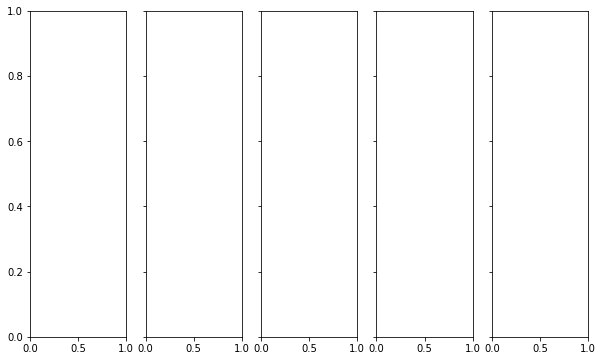

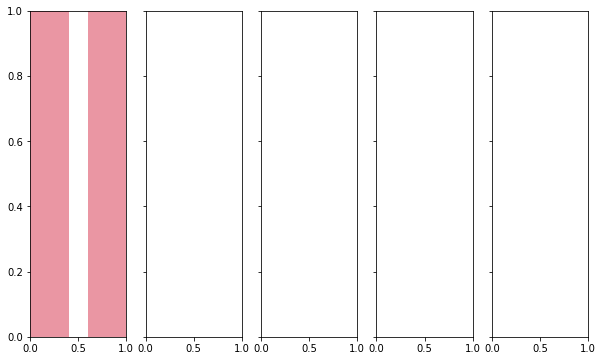

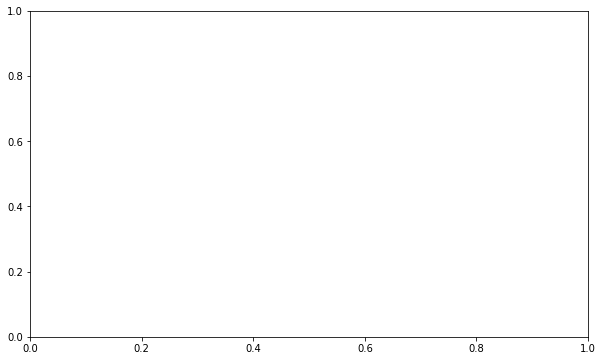

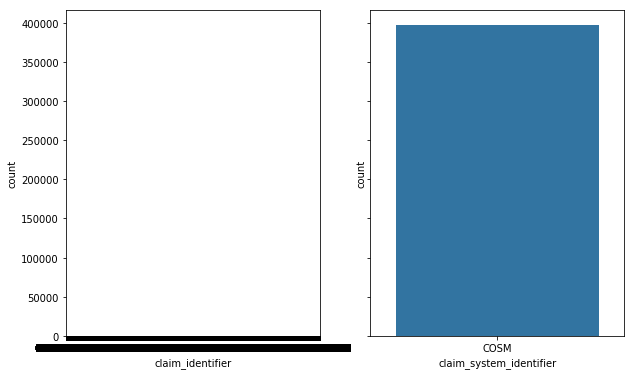

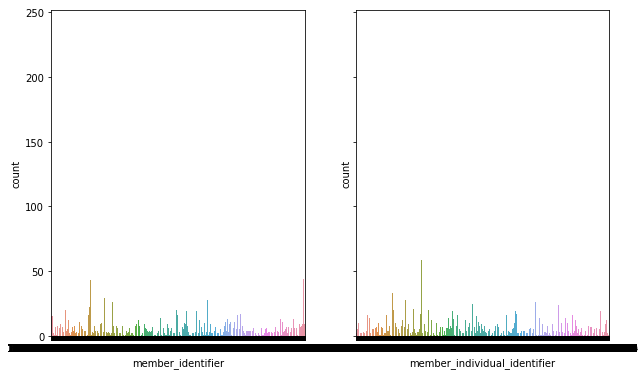

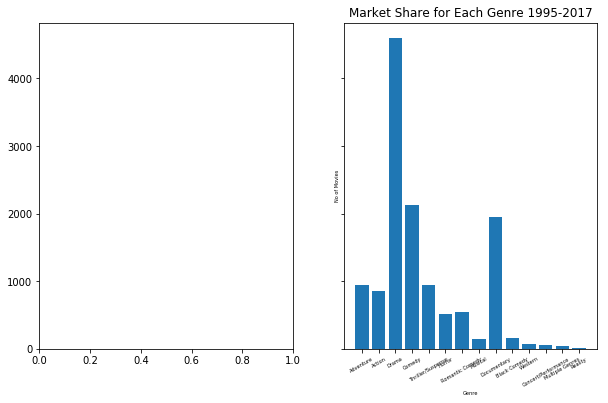

In [34]:
plot_bar_x()

In [ ]:
samp_mrg.shape

In [14]:
samp_mrg.drg.head()

0    0
1    0
2    0
3    0
4    0
Name: drg, dtype: int64

In [15]:
samp_mrg.revenue_code.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: revenue_code, dtype: object

In [ ]:
samp_mrg.drg.head()

count by value; cout the number of columns:
https://chrisalbon.com/python/data_wrangling/pandas_dataframe_count_values/
https://www.quora.com/How-do-I-get-the-number-of-columns-in-a-pandas-dataframe


In [16]:
rows, cols = samp_mrg.shape
print ("The number of rows of the dataframe is {}; and that of cols is {}".format(rows, cols))

The number of rows of the dataframe is 396521; and that of cols is 52


In [ ]:
# Explore the data by 13x4 subplots of bar charts:


## Next: Locality Sensitive Hashing Test

3. Apply the algorithms to s single attribute first, which we start with "Address", which has more words/characters

## Now in this test we load the csv files with delimitor ';' instead of ','

In [14]:
import pandas as pd
import os
import csv

In [1]:
data_dir = '/mapr/datalake/uhclake/perf/Sqoop_RX/ymalcow/501_mem_match_proj1/'
dir_tops = 'tops_all2_csv'
dir_cosmos = 'cosmos_all2_csv'

path_tops = os.path.join(data_dir, dir_tops)
path_cosmos = os.path.join(data_dir, dir_cosmos)

In [2]:
print (os.getcwd())

/home/hatscale


In [3]:
topses = os.listdir(path_tops)
cosmoses = os.listdir(path_cosmos)

In [4]:
mem_attrs = ['member_individual_identifier','src_cdb_xref_id','lgcy_src_id','social_security_number_hashed' , 'member_last_name','member_first_name' ,'member_middle_name','member_middle_initial_text', 'member_name_suffix' , 'mem_dob_hashed', 'memeber_zip_code_of_residence','member_sex','addr_line_1','addr_line_2','city_name','state','zipcode','country']

In [5]:
len(mem_attrs)

18

In [8]:
# Use only one chunk for each type of claim to perform initial test
samp_tops = pd.read_csv(os.path.join(path_tops, topses[1]), sep = ';', names = mem_attrs, error_bad_lines=False)
samp_cosmos = pd.read_csv(os.path.join(path_cosmos, cosmoses[1]), sep = ';', names = mem_attrs, error_bad_lines=False)

/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
samp_tops.member_first_name.count()

1639298

In [9]:
samp_tops.head()

,member_individual_identifier,src_cdb_xref_id,lgcy_src_id,social_security_number_hashed,member_last_name,member_first_name,member_middle_name,member_middle_initial_text,member_name_suffix,mem_dob_hashed,memeber_zip_code_of_residence,member_sex,addr_line_1,addr_line_2,city_name,state,zipcode,country
0,473964115,121465348,00397460021438571100001,552dc9e193e2982b016e0ada8321fa8b50c1923641836a...,BAIR,FORREST,D,D,NaN,32e2f6281b12f9fa438fffa47f6c3aca3fbb33b4019068...,21222,MALE,7629 OLD BATTLE GROVE RD,NaN,DUNDALK,MD,21222,US
1,373400744,156971291,00397460025876211700001,f120bb5698d520c5691b6d603a00bfd662d13bf177a045...,HULGAN,BRENDA,A,A,NaN,ca4acbd7623f3b24850cc4738b4926cb9e98d884f6d611...,30281,FEMALE,55 CAROLINE DR,NaN,STOCKBRIDGE,GA,30281,US
2,422062148,84880482,00397460042796389401001,223c210772e65dd2fb0c83e17b360246ee4ea9c99f9da6...,BUSBY,SHIRLEY,NaN,NaN,NaN,ad2ac68775efad36b871dc10daa7e31f5a7e9686f28c41...,39440,FEMALE,15 SHADY OAK RD,NaN,LAUREL,MS,39440,US
3,473897609,216143324,00397460049738929800001,aec3aff464c8fee20ebcbd3fb362acd88cc67bd2281a1e...,BIRKENESS,RICHARD,V,V,NaN,404356c321bcf2569b642b553ac25668648771068577f2...,64068,MALE,17803 N.E. 89TH STREET,NaN,LIBERTY,MO,64068,US
4,425266756,50483920,00397460051462225902003,faa2f151591a8ceba7177092510f33488197aa9b16fe8d...,MCGEHAN,GREGORY,A,A,NaN,01611c51d8e9e36f35524403140115689b1e7dcd313092...,45066,MALE,420 THOMAS DRIVE,NaN,SPRINGBORO,OH,45066,US


In [18]:
lower_chk01_cosmos = samp_cosmos.addr_line_1.apply(lambda x : str(x).lower() if pd.notnull(x) else '')
lower_chk01_tops = samp_tops.addr_line_1.apply(lambda x : str(x).lower() if pd.notnull(x) else '')

In [19]:
import difflib

In [20]:
# First one that starts to work!!!
print(difflib.get_close_matches('262 plantation cir lot 21', lower_chk01_cosmos))

['26 plantation dr apt 105', '422 plantation ct', '6 plantation dr apt 104']


In [17]:
print(difflib.get_close_matches('262 plantation cir lot 21', lower_chk01_tops))

['1262 plantation cir', '20 plantation cir', '1428 plantation cir apt 1705']


In [34]:
cnt = 0
ratio_all = []

for address1 in lower_chk01_cosmos:
    cnt += 1
    print ("the currnt count is {}".format(cnt))
    if cnt > 3:
        break
    
    curr_sim = difflib.get_close_matches(address1, lower_chk01_tops, 5)
    print ("{}. for '{}',there are {} close matches:\n{}".format(cnt, address1, len(curr_sim), curr_sim))
    ratio = []
    sm = difflib.SequenceMatcher()
    sm.set_seq1(address1)
    for s in curr_sim:
        sm.set_seq2(s)
        ratio.append(sm.ratio())
    ratio_all.append(ratio)

the currnt count is 1
1. for '886 5th pl w',there are 5 close matches:
['8625 56th pl w', '8613 154th pl nw', '8165 155th pl n', '4816 99th pl sw', '2416 58th pl sw']
the currnt count is 2
2. for '17675 county road 55',there are 5 close matches:
['7605 county road 55', '1675 county road 959', '1765 county road 9', '1705 county road 5', '2767 county road 7755']
the currnt count is 3
3. for '4764 burnsdale trace apt b',there are 5 close matches:
['4836 sunset terrace apt a', '417 innsdale terr apt d', '3762 brookdale av apt b', '740 s burnside ave apt 328', '99 burnside ave apt 5']
the currnt count is 4


In [37]:
print ("No. of cosmos file vs. No. of tops files are {} : {}".format(len(cosmoses), len(topses)))

No. of cosmos file vs. No. of tops files are 96 : 110


In [21]:
topses

['.000029_0.crc',
 '000008_0',
 '000018_0',
 '000002_0',
 '.000013_0.crc',
 '.000005_0.crc',
 '000011_0',
 '000051_0',
 '000001_0',
 '.000019_0.crc',
 '.000043_0.crc',
 '.000042_0.crc',
 '.000048_0.crc',
 '.000000_0.crc',
 '.000026_0.crc',
 '.000028_0.crc',
 '000048_0',
 '.000014_0.crc',
 '.000015_0.crc',
 '000020_0',
 '000022_0',
 '.000050_0.crc',
 '000038_0',
 '000030_0',
 '000052_0',
 '.000017_0.crc',
 '000017_0',
 '.000049_0.crc',
 '000028_0',
 '000054_0',
 '000032_0',
 '.000054_0.crc',
 '.000007_0.crc',
 '.000022_0.crc',
 '.000053_0.crc',
 '000036_0',
 '.000044_0.crc',
 '.000020_0.crc',
 '.000006_0.crc',
 '000044_0',
 '000027_0',
 '000004_0',
 '000013_0',
 '000006_0',
 '000049_0',
 '000039_0',
 '000015_0',
 '000005_0',
 '000016_0',
 '000019_0',
 '.000024_0.crc',
 '.000025_0.crc',
 '.000009_0.crc',
 '000034_0',
 '000053_0',
 '000047_0',
 '000000_0',
 '000026_0',
 '000035_0',
 '.000012_0.crc',
 '000043_0',
 '.000038_0.crc',
 '000024_0',
 '.000002_0.crc',
 '.000030_0.crc',
 '000012_0

In [22]:
# Now let us traverswe through all the cosmos tables to see if thre is better mtches
# First we need to load all the files for tops member, 
#       extract the column of adrress line 1 and concat to the dataframe

addr1_all = []
cnt = 0
cnt_in = 0

for tops in topses:
    cnt += 1
    if tops[-3:] == 'crc':
        continue
    cnt_in += 1
    curr_tops = pd.read_csv(os.path.join(path_tops, tops), sep = ';', names = mem_attrs, quoting=csv.QUOTE_NONE, encoding='utf-8', error_bad_lines=False)

    # convert every character to lower case
    curr_lower_tops = list(set(curr_tops.addr_line_1.apply(lambda x : str(x).lower() if pd.notnull(x) else '')))
    print ("{} out of {}. File name={}; No. of curr uniq addr is {}".format(cnt_in, cnt, tops, len(curr_lower_tops)))
    addr1_all.extend(curr_lower_tops)

/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1 out of 2. File name=000008_0; No. of curr uniq addr is 1469988
2 out of 3. File name=000018_0; No. of curr uniq addr is 1468237
3 out of 4. File name=000002_0; No. of curr uniq addr is 1470296
4 out of 7. File name=000011_0; No. of curr uniq addr is 1468925
5 out of 8. File name=000051_0; No. of curr uniq addr is 749444
6 out of 9. File name=000001_0; No. of curr uniq addr is 1470520
7 out of 17. File name=000048_0; No. of curr uniq addr is 1109579
8 out of 20. File name=000020_0; No. of curr uniq addr is 1467669
9 out of 21. File name=000022_0; No. of curr uniq addr is 1467642
10 out of 23. File name=000038_0; No. of curr uniq addr is 1466001


/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


11 out of 24. File name=000030_0; No. of curr uniq addr is 1467428
12 out of 25. File name=000052_0; No. of curr uniq addr is 749424
13 out of 27. File name=000017_0; No. of curr uniq addr is 1468236
14 out of 29. File name=000028_0; No. of curr uniq addr is 1467992
15 out of 30. File name=000054_0; No. of curr uniq addr is 747621
16 out of 31. File name=000032_0; No. of curr uniq addr is 1466720
17 out of 36. File name=000036_0; No. of curr uniq addr is 1466448
18 out of 40. File name=000044_0; No. of curr uniq addr is 1112067
19 out of 41. File name=000027_0; No. of curr uniq addr is 1467783
20 out of 42. File name=000004_0; No. of curr uniq addr is 1469823
21 out of 43. File name=000013_0; No. of curr uniq addr is 1468787
22 out of 44. File name=000006_0; No. of curr uniq addr is 1469789
23 out of 45. File name=000049_0; No. of curr uniq addr is 1109642
24 out of 46. File name=000039_0; No. of curr uniq addr is 1465695
25 out of 47. File name=000015_0; No. of curr uniq addr is 14676

In [44]:
topses[0][-3:]

'crc'

In [15]:
# Now let us traverswe through all the cosmos tables to see if thre is better mtches
# First we need to load all the files for tops member, 
#       extract the column of adrress line 1 and concat to the dataframe

addr1_all = []
cnt = 0
cnt_in = 0

for tops in topses:
    cnt += 1
    if tops[-3:] == 'crc':
        continue
    cnt_in += 1
    curr_tops = pd.read_csv(os.path.join(path_tops, tops), sep = ',', names = mem_attrs, quoting=csv.QUOTE_NONE, encoding='utf-8', error_bad_lines=False)

    # convert every character to lower case
    curr_lower_tops = set(curr_tops.addr_line_1.apply(lambda x : str(x).lower() if pd.notnull(x) else ''))
    print ("{} out of {}. File name={}; No. of curr uniq addr is {}".format(cnt_in, cnt, tops, len(curr_lower_tops)))
    addr1_all.extend(curr_lower_tops)

/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1 out of 2. File name=000008_0; No. of curr uniq addr is 1


/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2 out of 3. File name=000018_0; No. of curr uniq addr is 1


/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


3 out of 4. File name=000002_0; No. of curr uniq addr is 1
4 out of 7. File name=000011_0; No. of curr uniq addr is 1
5 out of 8. File name=000051_0; No. of curr uniq addr is 1
6 out of 9. File name=000001_0; No. of curr uniq addr is 1
7 out of 17. File name=000048_0; No. of curr uniq addr is 1


/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


8 out of 20. File name=000020_0; No. of curr uniq addr is 1


/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


9 out of 21. File name=000022_0; No. of curr uniq addr is 1
10 out of 23. File name=000038_0; No. of curr uniq addr is 1
11 out of 24. File name=000030_0; No. of curr uniq addr is 1
12 out of 25. File name=000052_0; No. of curr uniq addr is 1
13 out of 27. File name=000017_0; No. of curr uniq addr is 1
14 out of 29. File name=000028_0; No. of curr uniq addr is 1
15 out of 30. File name=000054_0; No. of curr uniq addr is 1
16 out of 31. File name=000032_0; No. of curr uniq addr is 1
17 out of 36. File name=000036_0; No. of curr uniq addr is 1
18 out of 40. File name=000044_0; No. of curr uniq addr is 1
19 out of 41. File name=000027_0; No. of curr uniq addr is 1
20 out of 42. File name=000004_0; No. of curr uniq addr is 1
21 out of 43. File name=000013_0; No. of curr uniq addr is 1


/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


22 out of 44. File name=000006_0; No. of curr uniq addr is 1
23 out of 45. File name=000049_0; No. of curr uniq addr is 1
24 out of 46. File name=000039_0; No. of curr uniq addr is 1
25 out of 47. File name=000015_0; No. of curr uniq addr is 1


/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


26 out of 48. File name=000005_0; No. of curr uniq addr is 1
27 out of 49. File name=000016_0; No. of curr uniq addr is 1
28 out of 50. File name=000019_0; No. of curr uniq addr is 1
29 out of 54. File name=000034_0; No. of curr uniq addr is 1
30 out of 55. File name=000053_0; No. of curr uniq addr is 1
31 out of 56. File name=000047_0; No. of curr uniq addr is 1
32 out of 57. File name=000000_0; No. of curr uniq addr is 1
33 out of 58. File name=000026_0; No. of curr uniq addr is 1
34 out of 59. File name=000035_0; No. of curr uniq addr is 1
35 out of 61. File name=000043_0; No. of curr uniq addr is 1
36 out of 63. File name=000024_0; No. of curr uniq addr is 1
37 out of 66. File name=000012_0; No. of curr uniq addr is 1
38 out of 74. File name=000023_0; No. of curr uniq addr is 1
39 out of 76. File name=000045_0; No. of curr uniq addr is 1
40 out of 78. File name=000029_0; No. of curr uniq addr is 1


/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


41 out of 81. File name=000021_0; No. of curr uniq addr is 1
42 out of 82. File name=000009_0; No. of curr uniq addr is 1
43 out of 85. File name=000033_0; No. of curr uniq addr is 1
44 out of 87. File name=000042_0; No. of curr uniq addr is 1
45 out of 88. File name=000007_0; No. of curr uniq addr is 1
46 out of 90. File name=000037_0; No. of curr uniq addr is 1
47 out of 91. File name=000031_0; No. of curr uniq addr is 1
48 out of 94. File name=000014_0; No. of curr uniq addr is 1
49 out of 95. File name=000025_0; No. of curr uniq addr is 1
50 out of 96. File name=000003_0; No. of curr uniq addr is 1
51 out of 97. File name=000010_0; No. of curr uniq addr is 1
52 out of 101. File name=000040_0; No. of curr uniq addr is 1
53 out of 102. File name=000041_0; No. of curr uniq addr is 1
54 out of 103. File name=000050_0; No. of curr uniq addr is 1
55 out of 106. File name=000046_0; No. of curr uniq addr is 1


In [46]:
# Now let us traverswe through all the cosmos tables to see if thre is better mtches
# First we need to load all the files for tops member, 
#       extract the column of adrress line 1 and concat to the dataframe

addr1_all = []
cnt = 0
cnt_i = 0

for tops in topses:
    cnt += 1
    if tops[-3:] == 'crc':
        continue
    cnt_in += 1
    curr_tops = pd.read_csv(os.path.join(path_tops, tops), sep = ',', names = mem_attrs, quoting=csv.QUOTE_NONE, encoding='utf-8', error_bad_lines=False)

    # convert every character to lower case
    curr_lower_tops = set(curr_tops.addr_line_1.apply(lambda x : str(x).lower() if pd.notnull(x) else ''))
    print ("{} out of {}. File name={}; No. of curr uniq addr is {}".format(cnt_in, cnt, tops, len(curr_lower_tops)))
    addr1_all.extend(curr_lower_tops)

/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2. No. of current unique address is 1467567
3. No. of current unique address is 1428190
4. No. of current unique address is 1457181
7. No. of current unique address is 1418230
8. No. of current unique address is 739341
9. No. of current unique address is 1428330
17. No. of current unique address is 1110492
20. No. of current unique address is 1468092
21. No. of current unique address is 1445068
23. No. of current unique address is 1446867
24. No. of current unique address is 730451
26. No. of current unique address is 1387002
28. No. of current unique address is 1467078
29. No. of current unique address is 738961
30. No. of current unique address is 1360867
35. No. of current unique address is 1465993
39. No. of current unique address is 1052187
40. No. of current unique address is 1463178
41. No. of current unique address is 1311934
42. No. of current unique address is 1465049
43. No. of current unique address is 1467974
44. No. of current unique address is 1110013
45. No. of current 

ParserError: Error tokenizing data. C error: EOF inside string starting at line 1602960

In [50]:
# Now let us traverswe through all the cosmos tables to see if thre is better mtches
# First we need to load all the files for tops member, 
#       extract the column of adrress line 1 and concat to the dataframe
import csv

addr1_all = []
cnt = 0
cnt_in = 0

for tops in topses:
    cnt += 1
    if tops[-3:] == 'crc':
        continue
    cnt_in += 1
    curr_tops = pd.read_csv(os.path.join(path_tops, tops), sep = ',', names = mem_attrs, quoting=csv.QUOTE_NONE, encoding='utf-8', error_bad_lines=False)

    # convert every character to lower case
    curr_lower_tops = set(curr_tops.addr_line_1.apply(lambda x : str(x).lower() if pd.notnull(x) else ''))
    print ("{} out of {}. File name={}; No. of curr uniq addr is {}".format(cnt_in, cnt, tops, len(curr_lower_tops)))
    addr1_all.extend(curr_lower_tops)

/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1 out of 2. File name=000008_0; No. of curr uniq addr is 1467567
2 out of 3. File name=000018_0; No. of curr uniq addr is 1467529
3 out of 4. File name=000002_0; No. of curr uniq addr is 1469040
4 out of 7. File name=000011_0; No. of curr uniq addr is 1467887
5 out of 8. File name=000051_0; No. of curr uniq addr is 748979
6 out of 9. File name=000001_0; No. of curr uniq addr is 1469254
7 out of 17. File name=000048_0; No. of curr uniq addr is 1110492
8 out of 20. File name=000020_0; No. of curr uniq addr is 1468092
9 out of 21. File name=000022_0; No. of curr uniq addr is 1467317
10 out of 23. File name=000030_0; No. of curr uniq addr is 1466346
11 out of 24. File name=000052_0; No. of curr uniq addr is 748778
12 out of 26. File name=000017_0; No. of curr uniq addr is 1467492
13 out of 28. File name=000028_0; No. of curr uniq addr is 1467078
14 out of 29. File name=000054_0; No. of curr uniq addr is 748201
15 out of 30. File name=000032_0; No. of curr uniq addr is 1466129
16 out of 35.

In [51]:
len(addr1_all)

73551618

In [52]:
# Calculate the best 10 ratios of similarity between the first three form cosmos vs all tops
cnt = 0
ratio_all = []

for address1 in lower_chk01_cosmos:
    cnt += 1
    print ("the currnt count is {}".format(cnt))
    if cnt > 3:
        break
    
     
    curr_sim = difflib.get_close_matches(address1, addr1_all, 10)
    print ("{}. for '{}',there are {} close matches:\n{}".format(cnt, address1, len(curr_sim), curr_sim))
    ratio = []
    sm = difflib.SequenceMatcher()
    sm.set_seq1(address1)
    for s in curr_sim:
        sm.set_seq2(s)
        ratio.append(sm.ratio())
    ratio_all.append(ratio)

the currnt count is 1
1. for '886 5th pl w',there are 10 close matches:
['878 5th pl w', '878 5th pl w', '8835 45th pl w', '8835 45th pl w', '8835 45th pl w', '8835 45th pl w', '8835 45th pl w', '8819 55th pl w', '8819 55th pl w', '8817 56th pl w']
the currnt count is 2
2. for '17675 county road 55',there are 10 close matches:
['177 county road 55', '177 county road 55', '14765 county road 550', '14765 county road 550', '13765 county road 155', '13765 county road 155', '765 county road 515', '7605 county road 55', '7605 county road 55', '7605 county road 55']
the currnt count is 3
3. for '4764 burnsdale trace apt b',there are 10 close matches:
['4795 burnsdale trace apt b', '4795 burnsdale trace apt b', '4795 burnsdale trce apt b', '4795 burnsdale trace #b', '4795 burnsdale trace #b', '74 arsdale terrace apt 1', '4796 burnsdale trce', '4780 burnsdale trace', '46614 drysdale terrace apt 303', '46614 drysdale terrace apt 303']
the currnt count is 4


In [56]:
%%time

# Calculate the best 10 ratios of similarity between the first three form cosmos vs all tops
cnt = 0
ratio_all = []

for address1 in lower_chk01_cosmos:
    cnt += 1
    print ("the currnt count is {}".format(cnt))
    #if cnt <= 3:
    #    continue
    if cnt > 2:
        break
         
    curr_sim = difflib.get_close_matches(address1, addr1_all, 10)
    print ("{}. for '{}',there are {} close matches:\n{}".format(cnt, address1, len(curr_sim), curr_sim))
    ratio = []
    sm = difflib.SequenceMatcher()
    sm.set_seq1(address1)
    for s in curr_sim:
        sm.set_seq2(s)
        ratio.append(sm.ratio())
    ratio_all.append(ratio)

the currnt count is 1
1. for '886 5th pl w',there are 10 close matches:
['878 5th pl w', '878 5th pl w', '8835 45th pl w', '8835 45th pl w', '8835 45th pl w', '8835 45th pl w', '8835 45th pl w', '8819 55th pl w', '8819 55th pl w', '8817 56th pl w']
the currnt count is 2
2. for '17675 county road 55',there are 10 close matches:
['177 county road 55', '177 county road 55', '14765 county road 550', '14765 county road 550', '13765 county road 155', '13765 county road 155', '765 county road 515', '7605 county road 55', '7605 county road 55', '7605 county road 55']
the currnt count is 3
CPU times: user 25min 17s, sys: 197 ms, total: 25min 18s
Wall time: 25min 16s


https://stackoverflow.com/questions/2363731/append-new-row-to-old-csv-file-python

In [ ]:
# test the append mode to csv file
with open('beneficiary.csv', 'a') as newFile:
    newFileWriter = csv.writer(newFile)




In [47]:
len(addr1_all)

55260432

In [ ]:

cnt = 0
ratio_all = []

for address1 in lower_chk01_cosmos:
    cnt += 1
    print ("the currnt count is {}".format(cnt))
    if cnt > 3:
        break
    
    for 
    curr_sim = difflib.get_close_matches(address1, lower_chk01_tops, 1)
    print ("{}. for '{}',there are {} close matches:\n{}".format(cnt, address1, len(curr_sim), curr_sim))
    ratio = []
    sm = difflib.SequenceMatcher()
    sm.set_seq1(address1)
    for s in curr_sim:
        sm.set_seq2(s)
        ratio.append(sm.ratio())
    ratio_all.append(ratio)

In [41]:
import psutil
psutil.virtual_memory()

svmem(total=67547238400, available=62953009152, percent=6.8, used=17578250240, free=49968988160, active=12027662336, inactive=4303839232, buffers=1038233600, cached=11945787392, shared=31268864)

In [57]:
import tensorflow

ImportError: No module named 'tensorflow'

In [29]:
len(ratio_all)

3

In [32]:
ratio_all[2]

[0.7058823529411765,
 0.6938775510204082,
 0.6938775510204082,
 0.6538461538461539,
 0.6808510638297872,
 0.6808510638297872,
 0.68,
 0.68,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6545454545454545,
 0.6538461538461539,
 0.6538461538461539,
 0.6538461538461539,
 0.6122448979591837,
 0.6122448979591837,
 0.6530612244897959,
 0.6530612244897959,
 0.6530612244897959,
 0.6530612244897959,
 0.6521739130434783,
 0.6521739130434783,
 0.6521739130434783,
 0.6521739130434783,
 0.6086956521739131,
 0.6511627906976745,
 0.6046511627906976,
 0.6511627906976745,
 0.6415094339622641,
 0.6,
 0.64,
 0.64,
 0.64,
 0.64,
 0.64,
 0.64,
 0.64,
 0.64,
 0.6,
 0.6808510638297872,
 0.6382978723404256,
 0.6382978723404256,
 0.6382978723404256,
 0.6382978723404256,
 0.6382978723404256,
 0.5531914893617021,
 0.6363636363636364,
 0.6363636363636364,
 0.6363636363636364,
 0.5909090909090909,
 0.6363636363636364,
 0.5454545454545454,
 0.636363636363

In [ ]:
# Let us reverse tops with cosmos

cnt = 0
 
for address1 in lower_chk01_tops:
    cnt += 1
    print ("the currnt count is {}".format(cnt))
    if cnt > 3:
        break
    ratio_all = []
    curr_sim = difflib.get_close_matches(address1, lower_chk01_cosmos)
    ratio = []
    sm = difflib.SequenceMatcher()
    sm.set_seq1(address1)
    for s in curr_sim:
        sm.set_seq2(s)
        ratio.append(sm.ratio())
    ratio_all.append(ratio)

In [11]:
lower_chk01_cosmos.head()

0                  886 5th pl w
1          17675 county road 55
2    4764 burnsdale trace apt b
3           145 lonnie brown rd
4             1582 blackwell rd
Name: addr_line_1, dtype: object

In [49]:
samp_tops.member_last_name.value_counts(dropna=False).head(10)

SMITH        12567
JOHNSON      10115
WILLIAMS      8333
JONES         7436
BROWN         7413
DAVIS         5923
MILLER        5919
RODRIGUEZ     4567
GARCIA        4530
WILSON        4416
Name: member_last_name, dtype: int64

In [55]:
samp_tops.member_first_name.value_counts(dropna=False).head(10)

MICHAEL        23103
JOHN           17019
DAVID          16613
JAMES          16575
ROBERT         15740
WILLIAM        12829
CHRISTOPHER    10570
DANIEL         10026
JOSEPH          9859
MATTHEW         9704
Name: member_first_name, dtype: int64

In [74]:
fn_counts = samp_tops.member_first_name.value_counts(dropna=False)
addr1_counts = samp_tops.addr_line_1.value_counts(dropna=False)

fn_counts_c = samp_cosmos.member_first_name.value_counts(dropna=False)
addr1_counts_c = samp_cosmos.addr_line_1.value_counts(dropna=False)

In [77]:
print ("tops has {} different first names, with totally {} 'Mike's. ".format(fn_counts.count(), fn_counts['MIKE']))
print ("tops has {} different address 1 out of {} claims ".format(addr1_counts.count(), samp_tops.member_individual_identifier.count()))

print ("cosmos has {} different first names, with totally {} 'Mike's. ".format(fn_counts_c.count(), fn_counts_c['MIKE']))
print ("cosmos has {} different address 1 out of {} claims ".format(addr1_counts_c.count(), samp_cosmos.member_individual_identifier.count()))

tops has 133287 different first names, with totally 643 'Mike's. 
tops has 1467567 different address 1 out of 1652687 claims 
cosmos has 59638 different first names, with totally 179 'Mike's. 
cosmos has 509660 different address 1 out of 543925 claims 


In [78]:
addr1_01_tops = list(samp_tops['addr_line_1'])
addr1_01_cosmos = list(samp_cosmos['addr_line_1'])

In [79]:
addr1_set1_tops = set(addr1_01_tops)
addr1_set1_cosmos = set(addr1_01_cosmos)

In [80]:
print ("the length of the tops list={} and set ={}".format(len(addr1_01_tops), len(addr1_set1_tops)))

the length of the tops list=1652687 and set =1467567


In [81]:
# let us also set up the dataframes by pandas:
df_dedup01_tops = samp_tops.addr_line_1.apply(lambda x:x.lower().translate({None:"'.,"}) if pd.notnull(x) else '')
df_dedup01_cosmos = samp_cosmos.addr_line_1.apply(lambda x:x.lower().translate({None:"'.,"}) if pd.notnull(x) else '')

In [38]:
addr1_01_tops
MONTE CARLO WAY

['262 N MCDERMOTT RD',
 '11722 FAIRPOINT DR',
 '12608 LA REINA AVE',
 'RR 2 BOX 376',
 '6258 MAYFLOWER AVE',
 '1428 FOX HOLLOW RD',
 '13901 N. FL. AVE.',
 '19 MILLICENT AVE',
 nan,
 '818 CAMBRIDGE CIR',
 '306 MEDIA LINE ROAD',
 '2611 180 TH STREET',
 '104 BRACKLEY COURT',
 '193 CRESTLAND DR',
 '94 MOUNT PLEASENT STREET',
 '1917 RICE AVE',
 '3344 W PIERCE',
 '9286 TARA DR SW',
 '410 OATES LN',
 'P.O. BOX 15403',
 '3027 DUNGIVEN PL',
 '13927 ROSETTA DR.',
 '417 E SOUTH ST',
 '6238 SPRING CREEK RD.',
 '11 STABLESTONE DR',
 '1115 NORTH WALNUT',
 '5457 E CAROL LN',
 '428 PACIFIC TERRACE',
 '1520 TRACI PL',
 '10304 HOLLY DRIVE',
 '11514 MASSIVE MT',
 '104 ESTRELLA PL',
 '88 SCHOOL ST',
 '1213 E CR RD 550 S',
 'RT 3 BOX 519',
 '823 COTTONWOOD DR',
 '10000 MILLER CIR APT 109',
 'P.O. BOX 654',
 '236 WILLIAM WAY',
 '2 LEEWARD LANE',
 'RD 1 BOX 122',
 '655 MIDDLE COUNTRY RD',
 '% WEEKS',
 '141 SPRING BOX LANE',
 '53 GARFIELD PL',
 '108 E. PENN ST',
 '12969 GUACAMAYO COURT',
 '2917 WHILEAWAY CIR 

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

import hashlib

import string
import random

In [35]:
# N-gram function courtesy of Peter Norvig
def ngrams(seq, n):
    "List all the (overlapping) ngrams in a sequence."
    return [seq[i:i+n] for i in range(1+len(seq)-n)]

def permute(w, p):
    return ''.join(string.ascii_lowercase[p[ord(c) - ord('a')]] for c in w)

def jaccard_similarity(a, b):
    x = set(a)
    y = set(b)
    return len(x & y) / len(x | y)

def m(w, s, p):
    return sorted(permute(w, p))[:s]

def estimator(d1, d2, s, p):
    ma = set(m(d1, s, p))
    mb = set(m(d2, s, p))

    mab = set(sorted(list(ma | mb))[:s])
    return len(mab & ma & mb)/len(mab)

In [ ]:
random.seed(123456)

def rand_hash(p):
    a = random.randint(1,p-1)
    b = random.randint(1,p-1)
    def h(x):
        return ((a * x + b) % p) 
    return h

def min_hash_sig(s):
    return [min(h(ord(c) - ord('a')) for c in s) for h in hash_fam]

In [7]:
# read member information from the directory
tops_frame = pd.DataFrame()
list_tops = []
for filename in topses:
    if filename[-1] == '0':
        curr_tops = pd.read_csv(os.path.join(path_tops, filename), sep = ',', names = mem_attrs, error_bad_lines=False)
        list_tops.append(curr_tops)
tops_frame = pd.concat(list_tops)

/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


KeyboardInterrupt: 

## Analysis for the batch processing
According to the above warning, there may be two posibilities:
1. Different data type issue; then we can try to set dtype = False
2. Memory issue: we should computer similarity chunk by chunk 

In [ ]:
cnt_t = 0
cnt_m = 0

stop_t = 1
stop_m = 1

for file_tops in topses:
    if file_tops[-1] == '0':
        curr_tops = pd.read_csv(os.path.join(path_tops, file_tops), sep = ',', names = mem_attrs, error_bad_lines=False)
        for file_cosmos in cosmoses:
            if file_cosmos[-1] == '0':
                cnt_cosmos += 1
                curr_cosmos = pd.read_csv(os.path.join(path_cosmos, file_cosmos), sep = ',', names = mem_attrs, error_bad_lines=False)
                
                if cnt_cosmos >= stop_cosmos:
                    break;
            if cnt_tops >= stop_tops:
                break;

In [21]:
samp_tops = pd.read_csv(os.path.join(path_tops, topses[1]), sep = ',', names = mem_attrs, error_bad_lines=False)
samp_cosmos = pd.read_csv(os.path.join(path_cosmos, cosmoses[1]), sep = ',', names = mem_attrs, error_bad_lines=False)

/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
samp_tops 

,member_individual_identifier,src_cdb_xref_id,lgcy_src_id,social_security_number_hashed,member_last_name,membetr_first_name,member_middle_name,member_middle_initial_text,member_name_suffix,mem_dob_hashed,memeber_zip_code_of_residence,member_sex,addr_line_1,addr_line_2,city_name,state,zipcode,country
0,473964205,192468331,00397460021446777801001,c2add6c5077748ab58571948a9b102c91b7662b0717094...,SCHAFER,CATHERINE,NaN,NaN,NaN,0829c097775f1e0eef6af8d6e48267547a4328778229a8...,17321,FEMALE,262 N MCDERMOTT RD,NaN,FAWN GROVE,PA,17321,US
1,68967086,293668225,00139840026611364901001,35ea4c94486220ed55d211be6bdd58194f4fcb57341647...,KWONG,GEORGE,S,S,NaN,4277fced5ad359df9382584ec3172e5a3562bde36733a9...,77099,MALE,11722 FAIRPOINT DR,NaN,HOUSTON,TX,77099,US
2,443357485,293729381,00139840052262025203002,cd058094c08f969adfa012ab1b8dda458a6b095943d45d...,MCBRIDE,KRISTIN,L,L,NaN,7989cfb08e2d22cf343f2aed5fca5c2ece4472cba40f8d...,90242,FEMALE,12608 LA REINA AVE,NaN,DOWNEY,CA,90242,US
3,423594303,326736928,00175000002824515201001,11d812843a882ce8de627ed933342357356be22a2bed9a...,ATWATER,LAURA,A,A,NaN,5080fc6bb2162d6bf028b459aa72d1b167f8e6ff899720...,03864,FEMALE,RR 2 BOX 376,NaN,OSSIPEE,NH,03864,US
4,20375112,326856442,00175000028272451400001,07c333ec534946e69c0c9fec2fa270d4d301ce46e93493...,SALLEE,RENEE,S,S,NaN,c7b15a9badf2d045f0e80148b7ab529a8b365dfbf2fab3...,45237,FEMALE,6258 MAYFLOWER AVE,NaN,CINCINNATI,OH,45237,US
5,82451336,326966353,00175000054588958600001,faffdd1c910f9267c34ab0aab073bfe1271a6b89ba37dc...,HOFF,LAURIE,K,K,NaN,035ae46f78bafa573774b814a148ac52554aaceed53177...,12309,FEMALE,1428 FOX HOLLOW RD,NaN,NISKAYUNA,NY,12309,US
6,266757980,295577575,00205660059026638500001,f120bb5698d520c5691b6d603a00bfd662d13bf177a045...,HINSON,MELVIN,J,J,NaN,c42424c58cb883ba822538ab3905975b06b062f13081e6...,33613,MALE,13901 N. FL. AVE.,NaN,TAMPA,FL,33613,US
7,28556258,170419226,00230000008258442300001,d1d9858ba67bcfdaa196cd8dc395fcd9a7bf5f789daaee...,BARBER,TATIA,NaN,NaN,NaN,c218242bb812a7f671000aec8a48d1e4076deebc3bbdaf...,14215,FEMALE,19 MILLICENT AVE,NaN,BUFFALO,NY,14215,US
8,426486714,295178273,00230000015924675100001,739dc31ebfa8e38dba2ccb64fcb572c274afcceb97307e...,FOSTER,RENEE,NaN,NaN,NaN,cf79b9f1dfe67fb179cc339406fb260016b2f5a7179fea...,21117,FEMALE,NaN,NaN,OWINGS MILL,MD,21117,US
9,234579326,15871286,00230000017728843101001,f120bb5698d520c5691b6d603a00bfd662d13bf177a045...,CAIONE,VINCENT,NaN,NaN,NaN,7154a48cb711c4ef83f6c921e53554d5597c3d554694ce...,19018,MALE,818 CAMBRIDGE CIR,NaN,CLIFTON HEIGHTS,PA,19018,US


In [23]:
samp_cosmos

,member_individual_identifier,src_cdb_xref_id,lgcy_src_id,social_security_number_hashed,member_last_name,membetr_first_name,member_middle_name,member_middle_initial_text,member_name_suffix,mem_dob_hashed,memeber_zip_code_of_residence,member_sex,addr_line_1,addr_line_2,city_name,state,zipcode,country
0,136946841,138451977,BHM0217142488589200,95e730e09f7d193279bce7a660c73bb76e76405201b440...,MARSHALL,SALLY,NaN,NaN,NaN,21bde6e5b729f4589b2fb6b0b1a795f64991b0e784e321...,35204.0,FEMALE,886 5TH PL W,NaN,BIRMINGHAM,AL,35204,NaN
1,61000939,357508677,BHM0217190065511300,db07e4749900141ec6e357a833189969a593df15c92ab3...,AUST,MART,L,L,JR,ff39a03d60999cbfd71438e9a7e34403655e048d5ed8be...,36580.0,MALE,17675 COUNTY ROAD 55,NaN,SUMMERDALE,AL,36580,NaN
2,63231125,322718062,BHM0226342262683200,45a0960e31985b4fbd5072238d748492e4d9ee5355040b...,LAMAR,JOHN,H,H,NaN,073fd68a30bfccf0009e734b0e927249b8fddcd7962439...,36108.0,MALE,4764 BURNSDALE TRACE APT B,NaN,MONTGOMERY,AL,36108,NaN
3,479674826,621148202,BHM0320392711208400,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,RODRIGUEZ,OTILIO,NaN,NaN,NaN,7ef886aff7f6ecb9d6625b27e9a33f117afb442e3a286e...,31750.0,MALE,145 LONNIE BROWN RD,NaN,FITZGERALD,GA,31750,NaN
4,66811733,601446694,BHM0601997461977100,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,HALE,LYNDA,D,D,NaN,7a9e6cd437ad7d36bbd7e20ffa0cd8b28962560da827af...,30066.0,FEMALE,1582 BLACKWELL RD,NaN,MARIETTA,GA,30066,NaN
5,11632849,423779237,BNA1700090425734300,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,PACE,FREDDY,L,L,NaN,0b0c3c071c54bcb76a53faeee513a853da01c2d8a4c021...,37421.0,MALE,1729 MORRIS HILL RD,NaN,CHATTANOOGA,TN,37421,NaN
6,30574131,616660090,BNA1700096210393500,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,AYERS,DEWEY,W,W,NaN,237c9a97df76837f925a6b71a9088a392c965d60f9cd04...,37874.0,MALE,260 RABY ROAD,NaN,SWEETWATER,TN,37874,NaN
7,4760119,481463149,CHS0961110527887800,03a1d07bfe641b39c07d0e562c46c99c63fd57b6ae47fc...,SMITH,AARON,A,A,NaN,076e3e1f04c861c8d3dcf949b9b227fd1a28241aac685d...,21207.0,MALE,3502 SUSSEX RD,NaN,BALTIMORE,MD,21207,NaN
8,51773354,161794832,CHS0961121635780600,b25a69137c0ec051981b36462e37eba8f258c44226d62f...,SAUNDERS,JOHN,F,F,NaN,520c4867476bd08b9f40d7aeec20e3363fb8c94ddda4e1...,21740.0,MALE,127 SUNFLOWER DR,NaN,HAGERSTOWN,MD,21740,NaN
9,51788511,161799450,CHS0961121937064900,fbfd9e6de13632d597b50e10e5b58e3d2c25d95e09e451...,MOSHER,DANIEL,J,J,NaN,67a3891c5b372d3f110e86c52ebfb209c27e1f2b0c25b1...,21601.0,MALE,24 PLUM ST,NaN,EASTON,MD,21601,NaN


In [14]:
list001_tops = list(samp_tops['addr_line_1'])
list001_cosmos = list(samp_cosmos['addr_line_1'])

In [30]:
topses

['.000029_0.crc',
 '000008_0',
 '000018_0',
 '000002_0',
 '.000013_0.crc',
 '.000005_0.crc',
 '000011_0',
 '000051_0',
 '000001_0',
 '.000019_0.crc',
 '.000043_0.crc',
 '.000042_0.crc',
 '.000048_0.crc',
 '.000000_0.crc',
 '.000026_0.crc',
 '.000028_0.crc',
 '000048_0',
 '.000014_0.crc',
 '.000015_0.crc',
 '000020_0',
 '000022_0',
 '.000050_0.crc',
 '000030_0',
 '000052_0',
 '.000017_0.crc',
 '000017_0',
 '.000049_0.crc',
 '000028_0',
 '000054_0',
 '000032_0',
 '.000054_0.crc',
 '.000007_0.crc',
 '.000022_0.crc',
 '.000053_0.crc',
 '000036_0',
 '.000044_0.crc',
 '.000020_0.crc',
 '.000006_0.crc',
 '000044_0',
 '000027_0',
 '000004_0',
 '000013_0',
 '000006_0',
 '000049_0',
 '000039_0',
 '000015_0',
 '000005_0',
 '000016_0',
 '000019_0',
 '.000024_0.crc',
 '000038_1',
 '.000025_0.crc',
 '.000009_0.crc',
 '000034_0',
 '000053_0',
 '000047_0',
 '000000_0',
 '000026_0',
 '000035_0',
 '.000012_0.crc',
 '000043_0',
 '000024_0',
 '.000002_0.crc',
 '.000030_0.crc',
 '000012_0',
 '.000051_0.crc

In [26]:
top001 = pd.read_csv(os.path.join(path_tops, topses[1]), sep = ',', names = mem_attrs, error_bad_lines=False)

/opt/mapr/tools/python/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
top001.head()

,member_individual_identifier,src_cdb_xref_id,lgcy_src_id,social_security_number_hashed,member_last_name,membetr_first_name,member_middle_name,member_middle_initial_text,member_name_suffix,mem_dob_hashed,memeber_zip_code_of_residence,member_sex,addr_line_1,addr_line_2,city_name,state,zipcode,country
0,473964205,192468331,00397460021446777801001,c2add6c5077748ab58571948a9b102c91b7662b0717094...,SCHAFER,CATHERINE,NaN,NaN,NaN,0829c097775f1e0eef6af8d6e48267547a4328778229a8...,17321,FEMALE,262 N MCDERMOTT RD,NaN,FAWN GROVE,PA,17321,US
1,68967086,293668225,00139840026611364901001,35ea4c94486220ed55d211be6bdd58194f4fcb57341647...,KWONG,GEORGE,S,S,NaN,4277fced5ad359df9382584ec3172e5a3562bde36733a9...,77099,MALE,11722 FAIRPOINT DR,NaN,HOUSTON,TX,77099,US
2,443357485,293729381,00139840052262025203002,cd058094c08f969adfa012ab1b8dda458a6b095943d45d...,MCBRIDE,KRISTIN,L,L,NaN,7989cfb08e2d22cf343f2aed5fca5c2ece4472cba40f8d...,90242,FEMALE,12608 LA REINA AVE,NaN,DOWNEY,CA,90242,US
3,423594303,326736928,00175000002824515201001,11d812843a882ce8de627ed933342357356be22a2bed9a...,ATWATER,LAURA,A,A,NaN,5080fc6bb2162d6bf028b459aa72d1b167f8e6ff899720...,03864,FEMALE,RR 2 BOX 376,NaN,OSSIPEE,NH,03864,US
4,20375112,326856442,00175000028272451400001,07c333ec534946e69c0c9fec2fa270d4d301ce46e93493...,SALLEE,RENEE,S,S,NaN,c7b15a9badf2d045f0e80148b7ab529a8b365dfbf2fab3...,45237,FEMALE,6258 MAYFLOWER AVE,NaN,CINCINNATI,OH,45237,US


In [19]:
os.listdir('/mapr/datalake/uhclake/perf/ESLOADER/ymalcow')

PermissionError: [Errno 13] Permission denied: '/mapr/datalake/uhclake/perf/ESLOADER/ymalcow'

In [22]:
top001.count()

473964205                                                           1644956
192468331                                                           1644956
00397460021446777801001                                             1644956
c2add6c5077748ab58571948a9b102c91b7662b0717094dc36cdf70c7de1f82f    1644956
SCHAFER                                                             1644899
CATHERINE                                                           1644939
Unnamed: 6                                                           860197
Unnamed: 7                                                           860197
Unnamed: 8                                                            22951
0829c097775f1e0eef6af8d6e48267547a4328778229a81da146b638d0985c48    1644956
17321                                                               1644687
FEMALE                                                              1644956
262 N MCDERMOTT RD                                                  1644897
Unnamed: 13 

In [33]:
os.listdir('/mapr/datalake/uhclake/perf/Sqoop_RX/ymalcow/501_mem_match_proj1')

PermissionError: [Errno 13] Permission denied: '/mapr/datalake/uhclake/perf/Sqoop_RX/ymalcow/501_mem_match_proj1'

In [38]:
os.listdir('/mapr/datalake/uhclake/perf/Sqoop_RX/ymalcow/501_mem_match_proj1/tops_all_csv')

['.000029_0.crc',
 '000008_0',
 '000018_0',
 '000002_0',
 '.000013_0.crc',
 '.000005_0.crc',
 '000011_0',
 '000051_0',
 '000001_0',
 '.000019_0.crc',
 '.000043_0.crc',
 '.000042_0.crc',
 '.000048_0.crc',
 '.000000_0.crc',
 '.000026_0.crc',
 '.000028_0.crc',
 '000048_0',
 '.000014_0.crc',
 '.000015_0.crc',
 '000020_0',
 '000022_0',
 '.000050_0.crc',
 '000030_0',
 '000052_0',
 '.000017_0.crc',
 '000017_0',
 '.000049_0.crc',
 '000028_0',
 '000054_0',
 '000032_0',
 '.000054_0.crc',
 '.000007_0.crc',
 '.000022_0.crc',
 '.000053_0.crc',
 '000036_0',
 '.000044_0.crc',
 '.000020_0.crc',
 '.000006_0.crc',
 '000044_0',
 '000027_0',
 '000004_0',
 '000013_0',
 '000006_0',
 '000049_0',
 '000039_0',
 '000015_0',
 '000005_0',
 '000016_0',
 '000019_0',
 '.000024_0.crc',
 '000038_1',
 '.000025_0.crc',
 '.000009_0.crc',
 '000034_0',
 '000053_0',
 '000047_0',
 '000000_0',
 '000026_0',
 '000035_0',
 '.000012_0.crc',
 '000043_0',
 '000024_0',
 '.000002_0.crc',
 '.000030_0.crc',
 '000012_0',
 '.000051_0.crc

In [24]:
os.listdir('/mapr/datalake/uhclake/perf/ESLOADER')

PermissionError: [Errno 13] Permission denied: '/mapr/datalake/uhclake/perf/ESLOADER'

In [5]:
print (os.listdir('/mapr'))

['test1', 'uhg_admin', 'sas', 'abizer', 'shme_logs', 'application_1496404046651_777166', 'mapr-diagonstics-2016-07-06', 'oozie_old', 'datalake', 'user', 'oozie', 'hive', 'tmp', 'datalake_prod', 'opt', 'apps', 'shme_logs2', 'hbase', 'optum', 'tables', 'sandbox3', 'yarnlogs', 'secure_12042017', 'ng', 'yrnlogs', 'opdmbd_s', 'logs_pkvn', 'kdump', 'sandbox2', 'testvolume', 'data', 'mapr', 'dbsld0034.uhc.com-2018-02-12_14-20-13.tar', 'var']


In [18]:
from pyspark import SparkContext;
from pyspark import SparkConf
conf = (SparkConf().setMaster("yarn-client").setAppName("test")
        .set("spark.executor.memory", "10g")
        .set("spark.executor.instances", "11")
        .set("spark.driver.memory", "5g")
        .set("spark.shuffle.service.enabled","true")
        .set("spark.dynamicAllocation.enabled","true")
        .set("spark.dynamicAllocation.minExecutors","1")
        .set("spark.yarn.queue", "fabpwond_q1")
        )

In [ ]:
sparksql

In [35]:
cnt2018 = spark.sql("select count(*) from h2s.cosmos_professional_claim where mth in ('2018-01','2018-01','2018-01')");
cnt2018.show(1);

+--------+
|count(1)|
+--------+
| 9348281|
+--------+



In [ ]:
cnt2018 = spark.sql("select count(*) from h2s.cosmos_professional_claim where mth in ('2018-01','2018-01','2018-01')");
cnt2018.show(1);

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins, lw=0)

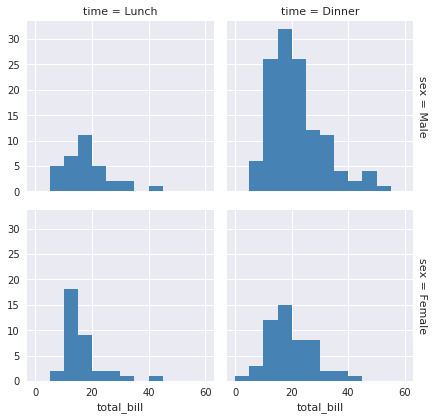

In [36]:
plt.show()